In [42]:
import pandas as pd
import numpy as np
import sklearn
import yaml
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import os
import sys

In [2]:
sys.path.append(os.path.abspath('../'))

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
DATA_PATH = "../data/heart_cleveland_upload.csv"

In [6]:
df = pd.read_csv(DATA_PATH)

In [8]:
statistics = df.describe()

In [10]:
statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [16]:
na_values = df.isna().sum(axis=0)

In [17]:
na_values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [24]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [39]:
for c in categorical: 
    print(c, df.value_counts(c).to_dict())

sex {1: 201, 0: 96}
cp {3: 142, 2: 83, 1: 49, 0: 23}
fbs {0: 254, 1: 43}
restecg {0: 147, 2: 146, 1: 4}
exang {0: 200, 1: 97}
slope {0: 139, 1: 137, 2: 21}
ca {0: 174, 1: 65, 2: 38, 3: 20}
thal {0: 164, 2: 115, 1: 18}


C:\Users\igor\AppData\Local\Temp/ipykernel_3432/3638611061.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


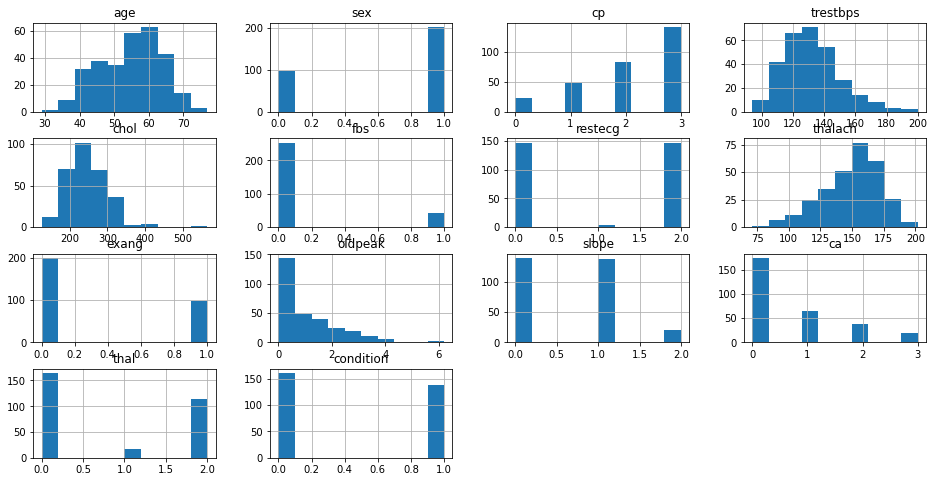

In [111]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 8)
df.hist(ax=ax)
plt.show()